{'Sun': {'position': array([0., 0., 0.]), 'velocity': array([0., 0., 0.])}, 'Earth': {'position': array([ 1.43753690e+08,  4.08215721e+07, -2.68367371e+03]), 'velocity': array([-8.63361159e+00,  2.85443435e+01, -1.39480832e-03])}, 'Jupiter': {'position': array([ 2.50414068e+08,  7.13665175e+08, -8.56709889e+06]), 'velocity': array([-12.48969123,   4.94502552,   0.25894535])}}
A[0] is 0 A[1] is 0 A[2] is 0.222222 A[3] is 0.333333 A[4] is 0.75 A[5] is 1 A[6] is 0.833333 
B[0][0] is 0 B[0][1] is 0 B[0][2] is 0 B[0][3] is 0 B[0][4] is 0 B[0][5] is 0 
B[1][0] is 0 B[1][1] is 0 B[1][2] is 0 B[1][3] is 0 B[1][4] is 0 B[1][5] is 0 
B[2][0] is 0 B[2][1] is 0.222222 B[2][2] is 0 B[2][3] is 0 B[2][4] is 0 B[2][5] is 0 
B[3][0] is 0 B[3][1] is 0.0833333 B[3][2] is 0.25 B[3][3] is 0 B[3][4] is 0 B[3][5] is 0 
B[4][0] is 0 B[4][1] is 0.539062 B[4][2] is -1.89844 B[4][3] is 2.10938 B[4][4] is 0 B[4][5] is 0 
B[5][0] is 0 B[5][1] is -1.41667 B[5][2] is 6.75 B[5][3] is -5.4 B[5][4] is 1.06667 B[5][5] i

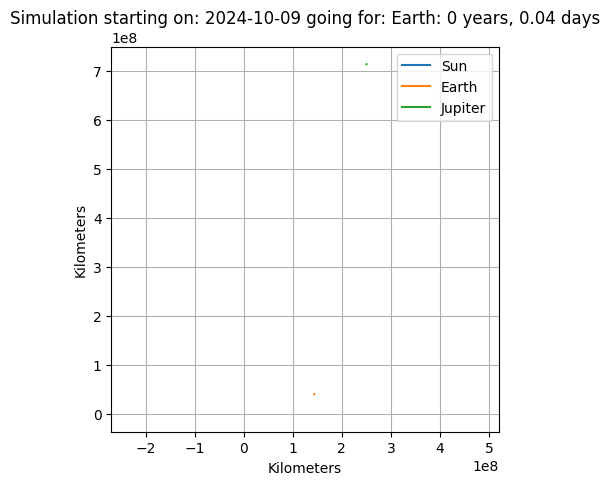

In [1]:
import sys
import os
library_path = os.path.abspath("../cplusplus")
if library_path not in sys.path:
    sys.path.append(library_path)
import Orbit_Sim
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import Image
from astroquery.jplhorizons import Horizons

# from astroquery.jplhorizons import Horizons
import numpy as np
from datetime import datetime, timedelta

from mpl_toolkits.mplot3d import Axes3D

# A class to do all this
# A constant
JPL_DICT = {
    'Sun':      {'id':'10',  'mass': 1988400e24},
    'Mercury':  {'id':'199', 'mass': 0.33010e24},
    'Venus':    {'id':'299', 'mass': 4.8673e24},
    'Earth':    {'id':'399', 'mass': 5.9722e24},
    'Mars':     {'id':'499', 'mass': 0.64169e24},
    'Jupiter':  {'id':'599', 'mass': 1.8982e27},
    'Saturn':   {'id':'699', 'mass': 5.6834e26},
    'Uranus':   {'id':'799', 'mass': 8.6810e25},
    'Neptune':  {'id':'899', 'mass': 1.02413e26},
    'Moon':     {'id':'301', 'mass': 0.07346e24},

    # asteroids in asteroid belt
    'Ceres':    {'id':'2000001', 'mass': 9.393e20},

    # Jupiter's Largest Moons
    'Io':       {'id': '501',  'mass': 8.931938e22},
    'Europa':   {'id': '502',  'mass': 4.799844e22},
    'Ganymede': {'id': '503',  'mass': 1.4819e23},  
    'Callisto': {'id': '504',  'mass': 1.075938e23},

    # Saturn's Largest Moons
    'Dione':    {'id': '604', 'mass': 1.095452e21},
    'Rhea':     {'id': '605', 'mass': 2.306518e21},
    'Titan':    {'id': '606', 'mass': 1.3452e23},
    'Iapetus':  {'id': '608', 'mass': 1.805635e21},

    # Uranus' Largest Moons
    'Ariel':    {'id': '701', 'mass': 1.353e21},
    'Umbriel':  {'id': '702', 'mass': 1.172e21},
    'Titania':  {'id': '703', 'mass': 3.527e21},
    'Oberon':   {'id': '704', 'mass': 3.014e21},

    # Pluto
    'Pluto':    {'id': '999', 'mass': 1.303e22}      
}

class NBodySim:
    def __init__(self, names, epoch=None):
        # Initialize the arrays for names, masses, and simulation data
        self.names = names  # Names of the simulants
        masses = np.zeros(len(names))
        for i,name in enumerate(names):
            masses[i] = JPL_DICT[name]['mass']
        self.masses = masses  # Masses of the simulants
        self.data = {}  # Dictionary to store position and velocity data
        self.AU_TO_KM = 1.496e8
        self.AU_DAY_TO_KM_S = 1731.46
        self.GRAVITY_CONSTANT = 6.67430e-20
        # Set epoch to today's date if not provided
        if epoch is None:
            today = datetime.now().strftime('%Y-%m-%d')
            tomorrow = (datetime.now() + timedelta(days=1)).strftime('%Y-%m-%d')
            self.epoch = {'start': today, 'stop': tomorrow, 'step': '1d'}
        else:
            self.epoch = epoch

    def query_jpl(self):
        """Query JPL Horizons for each simulant's position and velocity data."""
        for name in self.names:
            # Querying Horizons based on the name and epoch
            obj = Horizons(id=JPL_DICT[name]['id'], location='@sun', epochs=self.epoch)
            vectors = obj.vectors()
            # Store positional and velocity data (x, y, z, vx, vy, vz)
            self.data[name] = {
                'position': np.array([vectors['x'][0]*self.AU_TO_KM, vectors['y'][0]*self.AU_TO_KM, vectors['z'][0]*self.AU_TO_KM]),
                'velocity': np.array([vectors['vx'][0]*self.AU_DAY_TO_KM_S, vectors['vy'][0]*self.AU_DAY_TO_KM_S, vectors['vz'][0]*self.AU_DAY_TO_KM_S])
            }
    
    def get_simulation_results(self):
        return self.simulation_data

    def get_masses(self):
        """Return the array of masses for simulation."""
        return np.array(self.masses)
    
    def get_init_data(self):
        """Return positional and velocity data for all simulants."""
        return {name: {'position': self.data[name]['position'],
                       'velocity': self.data[name]['velocity']}
                for name in self.names}
    
    def get_init_data_array(self):
        """Return an array containing positions and velocities for all simulants."""
        positions = []
        velocities = []
        print(self.data)
        for name in self.names:
            if name in self.data:
                pos = self.data[name]['position']
                vel = self.data[name]['velocity']
                
                positions.extend(pos)
                velocities.extend(vel)
        
        # Concatenate positions and velocities into a single array
        return np.array(velocities + positions)

    def Do_Simulation(self,end_time,time_step):
        """Run n-body simulation from Orbit_Sim c++ code"""
        years, remainder = divmod(end_time, 365.24 * 86400)  # 86400 seconds in a day
        years = int(years)
        days = float(remainder) / 86400.0
        days = round(days,2)
        simulation_time_string = f"Earth: {years} years, {days} days"
        self.description_of_simulation = "Simulation starting on: " + self.epoch['start'] + " going for: "+ simulation_time_string
        self.simulation_data = Orbit_Sim.runge_kutta_system(self.get_init_data_array(),
                                                            self.get_masses(),
                                                            0.0, 
                                                            end_time,
                                                            time_step,
                                                            self.GRAVITY_CONSTANT)
    
    def Do_RKF45_Simulation(self,end_time,time_step,acceptable_error,lower_step_fraction_limit,upper_step_fraction_limit):
        """Run n-body simulation with RKF45 solver from Orbit_Sim c++ code"""
        years, remainder = divmod(end_time, 365.24 * 86400)  # 86400 seconds in a day
        years = int(years)
        days = float(remainder) / 86400.0
        days = round(days,2)
        simulation_time_string = f"Earth: {years} years, {days} days"
        self.description_of_simulation = "Simulation starting on: " + self.epoch['start'] + " going for: "+ simulation_time_string
        self.simulation_data = Orbit_Sim.runge_kutta_fehlberg_system(self.get_init_data_array(),
                                                            self.get_masses(),
                                                            0.0, 
                                                            end_time,
                                                            time_step,
                                                            self.GRAVITY_CONSTANT,
                                                            acceptable_error,
                                                            lower_step_fraction_limit,
                                                            upper_step_fraction_limit)

    def label_graph(self, positions):
        """Label graph with simulated positions (provided as input)."""
        for i, name in enumerate(self.names):
            print(f"Labelling {name} at position {positions[i]}")  # Placeholder for graph labeling

    def set_epoch(self, epoch):
        """Allow the user to update the epoch if desired."""
        self.epoch = epoch

    def Basic_Graphic(self):
        y_values = np.array(self.simulation_data[1])
        # Static Plot
        # plt.clf()
        # size = len(self.masses)
        plt.figure( figsize=(5,5) )

        current = int(len(y_values[0])/2)

        x_vals = []
        y_vals = []
        for x in self.names:
            x_val = y_values[:,current]
            x_vals.append(x_val)
            y_val = y_values[:,current+1]
            y_vals.append(y_val)
            plt.plot( x_val , y_val , label = x )
            current += 3
        plt.title(self.description_of_simulation)
        plt.xlabel('Kilometers')
        plt.ylabel('Kilometers')
        plt.legend()
        plt.grid()
        plt.axis('equal')
        plt.show()
    
    def Three_Dim_Graphic(self):
        y_values = np.array(self.simulation_data[1])
        # Static Plot
        # plt.clf()
        # size = len(self.masses)
        fig = plt.figure( figsize=(5,5) )
        ax = fig.add_subplot(111, projection='3d')

        current = int(len(y_values[0])/2)

        x_vals = []
        y_vals = []
        z_vals = []
        for x in self.names:
            x_val = y_values[:,current]
            x_vals.append(x_val)
            y_val = y_values[:,current+1]
            y_vals.append(y_val)
            z_val = y_values[:,current+2]
            z_vals.append(z_val)
            ax.plot(x_val, y_val, z_val, label=x)
            # ax.plot_surface(x_val, y_val, z_val, cmap='viridis')
            current += 3

        plt.title(self.description_of_simulation)
        plt.xlabel('Kilometers')
        plt.ylabel('Kilometers')
        plt.legend()
        plt.grid()
        plt.axis('equal')
        plt.show()
    
    def Animated_Graph(self,seconds = 8,lagtime = 0,name = ""):
        fig, ax = plt.subplots()
        size = len(self.names)
        y_values = np.array(self.simulation_data[1])

        current = int(len(y_values[0])/2)
        print(len(y_values))
        x_vals = []
        y_vals = []
        for x in range(size):
            x_val = y_values[:,current]
            x_vals.append(x_val)
            y_val = y_values[:,current+1]
            y_vals.append(y_val)
            current += 3
        line_orbits = []
        for i in range(size):
            line_orbit, = ax.plot( x_vals[i][0] , y_vals[i][0] , label = self.names[i] )
            # print(len(x_vals[i]))
            line_orbits.append(line_orbit)

        # We need the upper and lower limits for the graph:
        xl = 0
        xu = 0
        yl = 0
        yu = 0
        for i in x_vals:
            xl = min(xl,min(i))
            xu = max(xu,max(i))
        for i in y_vals:
            yl = min(yl,min(i))
            yu = max(yu,max(i))
        MULT_FACT = 1.05
        xl = xl * MULT_FACT
        xu = xu * MULT_FACT
        yl = yl * MULT_FACT
        yu = yu * MULT_FACT

        # print("size of x_vals:",len(x_vals))
        def animation_movie( frame ):
            # print("Frame:",frame)
            if lagtime == 0:
                for i, line in enumerate(line_orbits):
                    line.set_xdata(x_vals[i][:frame])
                    line.set_ydata(y_vals[i][:frame])
            else:
                for i, line in enumerate(line_orbits):
                    line.set_xdata(x_vals[i][(frame - lagtime):frame])
                    line.set_ydata(y_vals[i][(frame - lagtime):frame])
            return line_orbits
        # print(len(line_orbits))
        n_steps = int( len(y_values) )
        # print(n_steps)
        num_seconds_for_animation = seconds
        milliseconds_per_frame = 30

        frame_interval = int((milliseconds_per_frame*n_steps)/(1000*num_seconds_for_animation))
        print("frame interval:",frame_interval)

        animation = FuncAnimation( fig , animation_movie , frames = range(0,n_steps,frame_interval) , interval = milliseconds_per_frame , blit = True )
        
        # Display the animation inline
        ax.legend()
        ax.set_xlabel('Position in Kilometers')
        ax.set_ylabel('Position in Kilometers')
        ax.grid()
        ax.set_title(self.description_of_simulation)
        # ax.axis('auto')
        ax.set_aspect('equal', adjustable='box')
        ax.set_xlim(xl,xu)
        ax.set_ylim(yl,yu)
        
        # Save & Display the animation
        if name != "":
            if not os.path.isfile(name + '.gif'):
                animation.save("../animations/" + name + '.gif', writer='imagemagick', fps=30)
            Image(filename= "../animations/" + name + '.gif')
            
            # animation.save(name +'.mp4', writer='ffmpeg')
            # Video(name + '.mp4')
        else:# Use if you want to display an interactive widgit in-line
            %matplotlib widget

nbody_sim_3 = NBodySim(['Sun', 'Earth','Jupiter'])

# Automatically uses today's date for the epoch
nbody_sim_3.query_jpl()

nbody_sim_3.Do_RKF45_Simulation(180*24*3600,3600,1,0.9,1.1)
nbody_sim_3.Basic_Graphic()